# Project - Statistical Performance Indicator (SPI)

**Goal of the project**
* What can SPI tells us?

The SPI measures the capacity and maturity of national statistical systems by assessing the use of data, the quality of services, the coverage of topics, the source of information, and the infrastructure and availability of resources.

* Investigate regional SPI score
* SPI correlation with GDP per capita

In [1]:
import pandas as pd

**ACQUIRE**

In [2]:
# read data
spi = pd.read_csv('./data/SPI/API_IQ.SPI.OVRL_DS2_en_csv_v2_3186678.csv',skiprows=4)
meta = pd.read_csv('./data/SPI/Metadata_Country_API_IQ.SPI.OVRL_DS2_en_csv_v2_3186678.csv')
gdp = pd.read_csv('./data/SPI/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3159040.csv', skiprows=4)

In [3]:
spi.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Statistical performance indicators (SPI): Over...,IQ.SPI.OVRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Statistical performance indicators (SPI): Over...,IQ.SPI.OVRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Statistical performance indicators (SPI): Over...,IQ.SPI.OVRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,37.222917,42.577917,49.845000,49.756250,NaN,NaN
3,Africa Western and Central,AFW,Statistical performance indicators (SPI): Over...,IQ.SPI.OVRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Statistical performance indicators (SPI): Over...,IQ.SPI.OVRL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,43.735417,46.689583,55.232083,54.945833,NaN,NaN


In [4]:
meta.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


In [5]:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,147.836769,147.238537,156.426780,182.521139,162.594548,180.489043,...,1672.363658,1653.188436,1658.650062,1507.800256,1404.953164,1540.232473,1534.171767,1485.307425,1330.140232,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,...,641.871438,637.165464,613.856505,578.466353,509.220100,519.888913,493.756581,507.103392,508.808409,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.963779,113.114697,118.865837,123.478967,131.892939,138.566819,...,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332,1695.959215,1772.339155,1714.426800,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1895.770869,NaN


**PREPARE**

In [6]:
# retain needed column only
spi = spi[['Country Code','2019']]
gdp = gdp[['Country Code','2019']]
meta = meta[['Country Code','Region']]

In [7]:
spi.head()

,Country Code,2019
0,ABW,NaN
1,AFE,NaN
2,AFG,49.756250
3,AFW,NaN
4,AGO,54.945833


In [8]:
gdp.head()

,Country Code,2019
0,ABW,NaN
1,AFE,1485.307425
2,AFG,507.103392
3,AFW,1772.339155
4,AGO,2809.626088


In [9]:
meta.head()

,Country Code,Region
0,ABW,Latin America & Caribbean
1,AFE,NaN
2,AFG,South Asia
3,AFW,NaN
4,AGO,Sub-Saharan Africa


In [10]:
# check for missing values
spi.isnull().sum()

Country Code     0
2019            92
dtype: int64

In [11]:
spi = spi.dropna()
spi

,Country Code,2019
2,AFG,49.756250
4,AGO,54.945833
5,ALB,75.382917
8,ARE,59.669167
9,ARG,64.595833
...,...,...
260,WSM,57.047083
262,YEM,36.771250
263,ZAF,73.475000
264,ZMB,59.014167


In [12]:
meta.isnull().sum()

Country Code     0
Region          48
dtype: int64

In [13]:
meta = meta.dropna()
meta

,Country Code,Region
0,ABW,Latin America & Caribbean
2,AFG,South Asia
4,AGO,Sub-Saharan Africa
5,ALB,Europe & Central Asia
6,AND,Europe & Central Asia
...,...,...
260,XKX,Europe & Central Asia
261,YEM,Middle East & North Africa
262,ZAF,Sub-Saharan Africa
263,ZMB,Sub-Saharan Africa


In [14]:
gdp.isnull().sum()

Country Code     0
2019            19
dtype: int64

In [15]:
gdp = gdp.dropna()
gdp

,Country Code,2019
1,AFE,1485.307425
2,AFG,507.103392
3,AFW,1772.339155
4,AGO,2809.626088
5,ALB,5355.847795
...,...,...
260,WSM,4324.101774
261,XKX,4445.890702
263,ZAF,6001.401121
264,ZMB,1305.002214


In [16]:
# rename columns
spi = spi.rename(columns={"2019":'SPI'})
gdp = gdp.rename(columns={"2019":'GDP'})

In [17]:
spi

,Country Code,SPI
2,AFG,49.756250
4,AGO,54.945833
5,ALB,75.382917
8,ARE,59.669167
9,ARG,64.595833
...,...,...
260,WSM,57.047083
262,YEM,36.771250
263,ZAF,73.475000
264,ZMB,59.014167


In [18]:
gdp

,Country Code,GDP
1,AFE,1485.307425
2,AFG,507.103392
3,AFW,1772.339155
4,AGO,2809.626088
5,ALB,5355.847795
...,...,...
260,WSM,4324.101774
261,XKX,4445.890702
263,ZAF,6001.401121
264,ZMB,1305.002214


In [19]:
# merge the data (spi & gdp)
datasets = spi.merge(gdp, on='Country Code')

In [20]:
datasets

,Country Code,SPI,GDP
0,AFG,49.756250,507.103392
1,AGO,54.945833,2809.626088
2,ALB,75.382917,5355.847795
3,ARE,59.669167,43103.336293
4,ARG,64.595833,9912.281809
...,...,...,...
165,VUT,40.691667,3102.346790
166,WSM,57.047083,4324.101774
167,ZAF,73.475000,6001.401121
168,ZMB,59.014167,1305.002214


In [21]:
datasets = datasets.merge(meta, how='inner', on='Country Code')
datasets.head()

,Country Code,SPI,GDP,Region
0,AFG,49.756250,507.103392,South Asia
1,AGO,54.945833,2809.626088,Sub-Saharan Africa
2,ALB,75.382917,5355.847795,Europe & Central Asia
3,ARE,59.669167,43103.336293,Middle East & North Africa
4,ARG,64.595833,9912.281809,Latin America & Caribbean


**ANALYZE**

In [25]:
# region SPI
datasets.groupby('Region')['SPI'].mean()

Region
East Asia & Pacific           60.433021
Europe & Central Asia         79.407031
Latin America & Caribbean     61.290865
Middle East & North Africa    58.008640
North America                 88.194792
South Asia                    58.738281
Sub-Saharan Africa            51.775572
Name: SPI, dtype: float64

<AxesSubplot:ylabel='Region'>

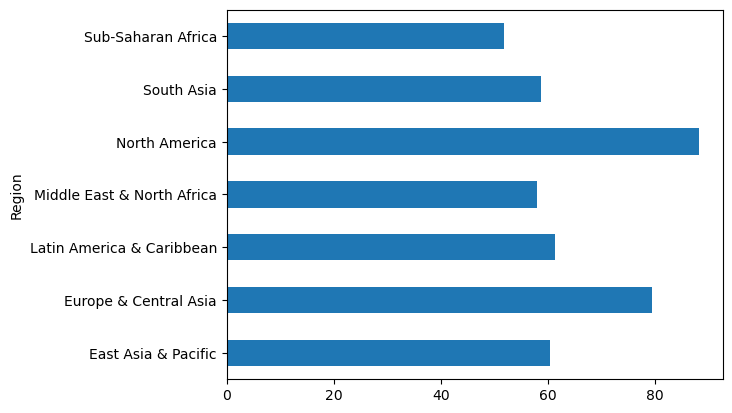

In [26]:
datasets.groupby('Region')['SPI'].mean().plot.barh()

In [27]:
# region GDP
datasets.groupby('Region')['GDP'].mean()

Region
East Asia & Pacific           13146.487797
Europe & Central Asia         27152.961460
Latin America & Caribbean      9074.663859
Middle East & North Africa    16966.440762
North America                 55803.100832
South Asia                     3092.170830
Sub-Saharan Africa             2356.133699
Name: GDP, dtype: float64

<AxesSubplot:xlabel='GDP', ylabel='Region'>

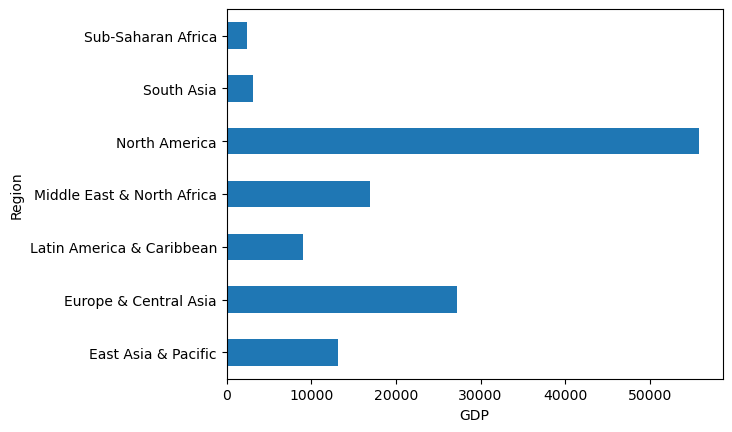

In [28]:
datasets.groupby('Region')['GDP'].mean().plot.barh(xlabel='GDP')

<AxesSubplot:xlabel='GDP', ylabel='SPI'>

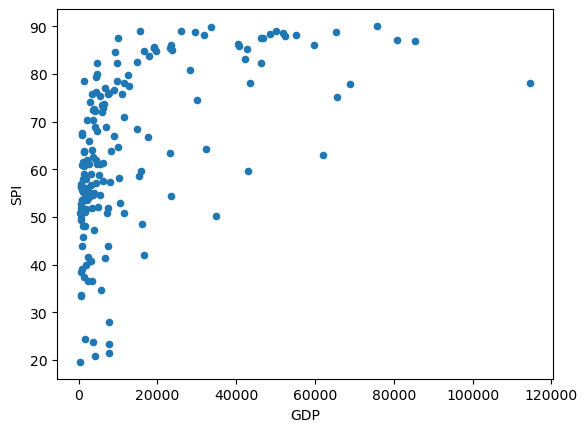

In [30]:
# exponential growth with linear scale
datasets.plot.scatter(x='GDP',y="SPI")

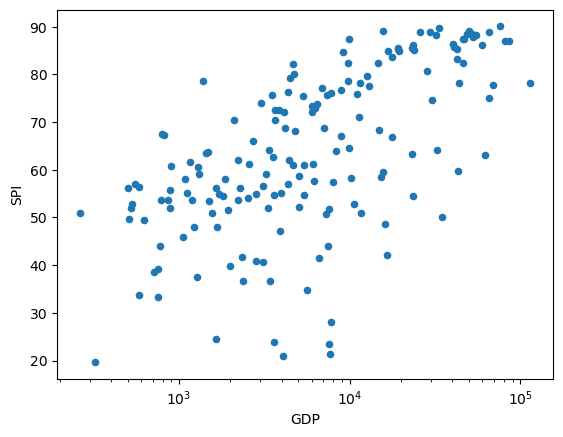

In [29]:
# exponential growth with logarithmic scale
datasets.plot.scatter(x='GDP',y="SPI", logx=True);

**REPORT**

In [35]:
# sort the values

regional_spi = datasets.groupby('Region')['SPI'].mean().sort_values(ascending=False)

<AxesSubplot:ylabel='Region'>

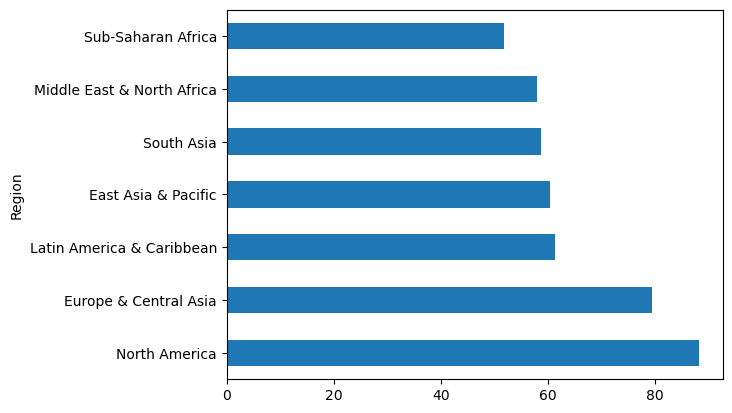

In [36]:
regional_spi.plot.barh()

In [37]:
# add color to regional plot
colors = datasets['Region'].factorize()
colors

(array([0, 1, 2, 3, 4, 2, 5, 2, 2, 1, 2, 1, 1, 0, 2, 3, 4, 2, 2, 4, 4, 4,
        0, 1, 6, 2, 4, 5, 1, 1, 1, 1, 4, 1, 4, 2, 2, 2, 3, 2, 4, 3, 4, 3,
        2, 2, 1, 2, 5, 2, 5, 1, 2, 2, 1, 1, 1, 1, 2, 4, 4, 4, 2, 4, 2, 5,
        0, 2, 3, 3, 2, 3, 2, 4, 3, 5, 2, 1, 2, 5, 5, 5, 3, 5, 3, 1, 3, 4,
        0, 1, 2, 2, 2, 3, 2, 1, 0, 4, 5, 2, 1, 3, 5, 2, 5, 1, 1, 1, 1, 5,
        1, 1, 1, 4, 2, 2, 0, 5, 3, 0, 4, 4, 5, 5, 2, 2, 4, 3, 3, 2, 2, 1,
        3, 1, 1, 5, 5, 1, 4, 1, 2, 1, 4, 2, 2, 2, 1, 1, 1, 1, 5, 2, 2, 5,
        4, 3, 2, 1, 1, 2, 4, 6, 2, 4, 5, 5, 5, 1, 1, 1], dtype=int64),
 Index(['South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia',
        'Middle East & North Africa', 'Latin America & Caribbean',
        'East Asia & Pacific', 'North America'],
       dtype='object'))

In [38]:
colors = colors[0]

<AxesSubplot:xlabel='GDP', ylabel='SPI'>

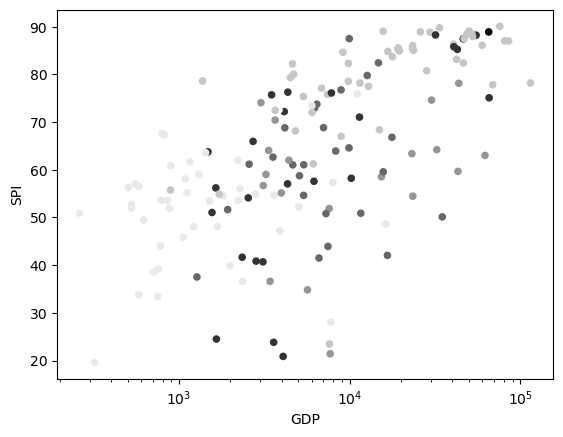

In [42]:
datasets.plot.scatter(x='GDP',y='SPI',c=colors,logx=True)

In [54]:
# datasets.plot.scatter(x='GDP',y='SPI',c=colors,logx=True,cmap='tab10')